In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
from zipfile import ZipFile
import geopandas as gpd
from shapely.geometry import Point

In [3]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

# Data

In this notebook, I use geospatial data provided by the United States Census Bureau. The US Census Bureau hosts a **massive** amount of data. As a result, they've made a lot of different interfaces to help you find data. I've used the [American Fact Finder interface](https://factfinder.census.gov/faces/nav/jsf/pages/download_center.xhtml) to download the 2011-2015 American Community Survey Estimates. To get this data set, you can get it from the data section of this notebook's [github repository](https://github.com/MattTriano/personal_site_public/tree/master/data/census), or you can go to the **American Fact Finder** site and select:
* **Dataset** $\rightarrow$
    * *Select a Program:* **American Community Survey**
    * *Select a dataset and click Add to Your Selections:* **2015 ACS 5-year estimates**
    * Then click the button below the list of ACS options, then click **NEXT**.
* **Geographies** $\rightarrow$ 
    * *Select a geographic type:*  **Census Tract**
    * *Select a state:* **Illinois**
    * *Select a county:* **Cook**
    * *Select one or more geographic areas and click Add to Your Selections:* **All Census Tracts within Cook County, Illinois**
    * click **ADD TO YOUR SELECTIONS**, then click **NEXT**.
* **Search Results** $\rightarrow$
    * Type **ACS DEMOGRAPHIC AND HOUSING ESTIMATES** or **DP05** in the search field, and press enter.
    * Click the check box to the left of the **ACS DEMOGRAPHIC AND HOUSING ESTIMATES** option, and click **Download**.
    * Click **OK** to prepare the data set for download, then click **DOWNLOAD**.
    
It's kind of a chore to find data sets you found in the past unless you remember the data set ID or table name, but that's the cost of having access to such a massive trove of data.

In [4]:
ZIP_PATH = os.path.join('data', 'census', 'ACS_15_5YR_DP05.zip') 
with ZipFile(ZIP_PATH) as zip_file:
    with zip_file.open('ACS_15_5YR_DP05_with_ann.csv') as my_zipped_csv:
        il_acs_15 = pd.read_csv(my_zipped_csv, header=1)

il_acs_15.head()

,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Margin of Error; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Percent Margin of Error; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Margin of Error; SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,Percent Margin of Error; SEX AND AGE - Total population - Male,Estimate; SEX AND AGE - Total population - Female,Margin of Error; SEX AND AGE - Total population - Female,Percent; SEX AND AGE - Total population - Female,Percent Margin of Error; SEX AND AGE - Total population - Female,Estimate; SEX AND AGE - Under 5 years,Margin of Error; SEX AND AGE - Under 5 years,Percent; SEX AND AGE - Under 5 years,Percent Margin of Error; SEX AND AGE - Under 5 years,Estimate; SEX AND AGE - 5 to 9 years,Margin of Error; SEX AND AGE - 5 to 9 years,Percent; SEX AND AGE - 5 to 9 years,Percent Margin of Error; SEX AND AGE - 5 to 9 years,Estimate; SEX AND AGE - 10 to 14 years,Margin of Error; SEX AND AGE - 10 to 14 years,Percent; SEX AND AGE - 10 to 14 years,Percent Margin of Error; SEX AND AGE - 10 to 14 years,Estimate; SEX AND AGE - 15 to 19 years,Margin of Error; SEX AND AGE - 15 to 19 years,Percent; SEX AND AGE - 15 to 19 years,Percent Margin of Error; SEX AND AGE - 15 to 19 years,Estimate; SEX AND AGE - 20 to 24 years,Margin of Error; SEX AND AGE - 20 to 24 years,Percent; SEX AND AGE - 20 to 24 years,Percent Margin of Error; SEX AND AGE - 20 to 24 years,Estimate; SEX AND AGE - 25 to 34 years,Margin of Error; SEX AND AGE - 25 to 34 years,Percent; SEX AND AGE - 25 to 34 years,Percent Margin of Error; SEX AND AGE - 25 to 34 years,Estimate; SEX AND AGE - 35 to 44 years,Margin of Error; SEX AND AGE - 35 to 44 years,Percent; SEX AND AGE - 35 to 44 years,Percent Margin of Error; SEX AND AGE - 35 to 44 years,Estimate; SEX AND AGE - 45 to 54 years,Margin of Error; SEX AND AGE - 45 to 54 years,Percent; SEX AND AGE - 45 to 54 years,Percent Margin of Error; SEX AND AGE - 45 to 54 years,Estimate; SEX AND AGE - 55 to 59 years,Margin of Error; SEX AND AGE - 55 to 59 years,Percent; SEX AND AGE - 55 to 59 years,Percent Margin of Error; SEX AND AGE - 55 to 59 years,Estimate; SEX AND AGE - 60 to 64 years,Margin of Error; SEX AND AGE - 60 to 64 years,Percent; SEX AND AGE - 60 to 64 years,Percent Margin of Error; SEX AND AGE - 60 to 64 years,Estimate; SEX AND AGE - 65 to 74 years,Margin of Error; SEX AND AGE - 65 to 74 years,Percent; SEX AND AGE - 65 to 74 years,Percent Margin of Error; SEX AND AGE - 65 to 74 years,Estimate; SEX AND AGE - 75 to 84 years,Margin of Error; SEX AND AGE - 75 to 84 years,Percent; SEX AND AGE - 75 to 84 years,Percent Margin of Error; SEX AND AGE - 75 to 84 years,Estimate; SEX AND AGE - 85 years and over,Margin of Error; SEX AND AGE - 85 years and over,Percent; SEX AND AGE - 85 years and over,Percent Margin of Error; SEX AND AGE - 85 years and over,Estimate; SEX AND AGE - Median age (years),Margin of Error; SEX AND AGE - Median age (years),Percent; SEX AND AGE - Median age (years),Percent Margin of Error; SEX AND AGE - Median age (years),Estimate; SEX AND AGE - 18 years and over,Margin of Error; SEX AND AGE - 18 years and over,Percent; SEX AND AGE - 18 years and over,Percent Margin of Error; SEX AND AGE - 18 years and over,Estimate; SEX AND AGE - 21 years and over,Margin of Error; SEX AND AGE - 21 years and over,Percent; SEX AND AGE - 21 years and over,Percent Margin of Error; SEX AND AGE - 21 years and over,Estimate; SEX AND AGE - 62 years and over,Margin of Error; SEX AND AGE - 62 years and over,Percent; SEX AND AGE - 62 years and over,Percent Margin of Error; SEX AND AGE - 62 years and over,Estimate; SEX AND AGE - 65 years and over,Margin of Error; SEX AND AGE - 65 years and over,Percent; SEX AND AGE - 65 years and over,Percent Margin of Error; SEX AND AGE - 65 years and over,Estimate; SEX AND AGE - 18 years and over.1,Margin of Error; SEX AND AGE - 18 years and over.1,Percent; SEX AND A

In [5]:
one_race_cols = []
for col_name in il_acs_15.columns.tolist():
    if ("One race" in col_name) & ("Percent;" in col_name):
        one_race_cols.append(col_name)

In [6]:
one_race_cols

['Percent; RACE - Total population - One race',
 'Percent; RACE - One race',
 'Percent; RACE - One race - White',
 'Percent; RACE - One race - Black or African American',
 'Percent; RACE - One race - American Indian and Alaska Native',
 'Percent; RACE - One race - American Indian and Alaska Native - Cherokee tribal grouping',
 'Percent; RACE - One race - American Indian and Alaska Native - Chippewa tribal grouping',
 'Percent; RACE - One race - American Indian and Alaska Native - Navajo tribal grouping',
 'Percent; RACE - One race - American Indian and Alaska Native - Sioux tribal grouping',
 'Percent; RACE - One race - Asian',
 'Percent; RACE - One race - Asian - Asian Indian',
 'Percent; RACE - One race - Asian - Chinese',
 'Percent; RACE - One race - Asian - Filipino',
 'Percent; RACE - One race - Asian - Japanese',
 'Percent; RACE - One race - Asian - Korean',
 'Percent; RACE - One race - Asian - Vietnamese',
 'Percent; RACE - One race - Asian - Other Asian',
 'Percent; RACE - One 

In [7]:
race_df = il_acs_15[['Id2', 
                     'Percent; RACE - One race',
                     'Percent; RACE - One race - White', 
                     'Percent; RACE - One race - Black or African American', 
                     'Percent; RACE - One race - Asian', 
                     'Percent; RACE - One race - Some other race']].copy()

In [8]:
race_df.head()

,Id2,Percent; RACE - One race,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; RACE - One race - Some other race
0,17031010100,97.2,53.2,38.6,3.8,1.6
1,17031010201,96.4,46.9,45.6,3.1,0.6
2,17031010202,97.0,51.1,29.3,8.0,8.0
3,17031010300,97.3,57.2,25.4,12.4,2.1
4,17031010400,96.5,74.7,13.2,6.7,1.9


## Chicago's Census Tracts

This demographic data is interesting, but if we want to map it out, we need a way to connect these demographic data points to their geographic locations. Fortunately, we can download a **shapefile** describing the geometries and names of all the census tracts in Chicago from [Chicago's Data Portal](https://www.cityofchicago.org/city/en/depts/doit/dataset/boundaries_-_censustracts.html) (click **menu**, then click **Download** as a **Shapefile**).

In [9]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'census', 'Boundaries - Census Tracts - 2010.zip')
coord_system = {'init': 'epsg:4326'}
chicago_census_tracts = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)

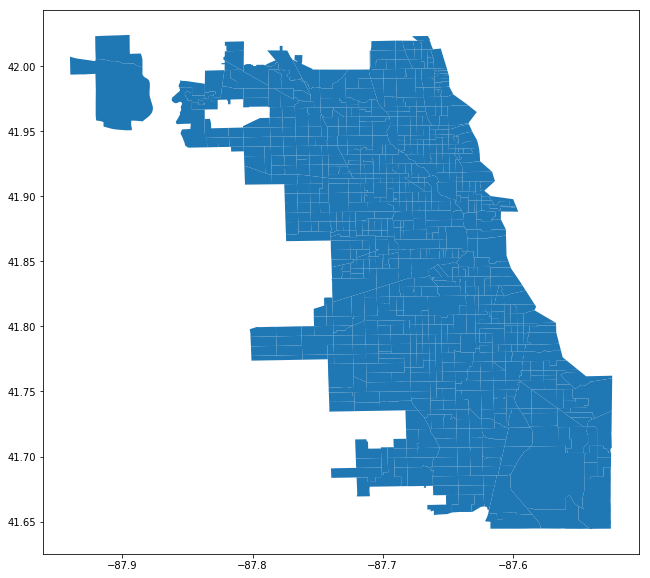

In [10]:
chicago_census_tracts.plot(figsize=(15,10))

In [11]:
chicago_census_tracts.head()

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,..."
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001183 41.8527970000265,..."
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,..."


To merge the geographic data to the demographic data, I need to find a column that both sets of data share. The geographic data's **geoid10** column looks a lot like the **Id2** column in the demographic data (and it does have the form of a census tract id). But before I can use this shared feature to merge these data sets, I need to make sure the values have the same type.

We see that in the geospatial data set, the **geoid10** feature is of the 'object' type (which is pandas way of saying it's of the 'string' type), but in the demographic data, **Id2**, is of the 'integer' type. 

In [12]:
chicago_census_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
statefp10     801 non-null object
countyfp10    801 non-null object
tractce10     801 non-null object
namelsad10    801 non-null object
commarea      801 non-null object
geoid10       801 non-null object
commarea_n    801 non-null float64
name10        801 non-null object
notes         12 non-null object
geometry      801 non-null object
dtypes: float64(1), object(9)
memory usage: 62.7+ KB


In [13]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 6 columns):
Id2                                                     1320 non-null int64
Percent; RACE - One race                                1320 non-null object
Percent; RACE - One race - White                        1320 non-null object
Percent; RACE - One race - Black or African American    1320 non-null object
Percent; RACE - One race - Asian                        1320 non-null object
Percent; RACE - One race - Some other race              1320 non-null object
dtypes: int64(1), object(5)
memory usage: 62.0+ KB


So I'll just coerce the **Id2** feature to be strings.

In [14]:
race_df['Id2'] = race_df['Id2'].astype(str)

In [15]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 6 columns):
Id2                                                     1320 non-null object
Percent; RACE - One race                                1320 non-null object
Percent; RACE - One race - White                        1320 non-null object
Percent; RACE - One race - Black or African American    1320 non-null object
Percent; RACE - One race - Asian                        1320 non-null object
Percent; RACE - One race - Some other race              1320 non-null object
dtypes: object(6)
memory usage: 62.0+ KB


Here's the merge, which does most of the cool work, despite only being one little line.

In [16]:
chicago_race = pd.merge(left=chicago_census_tracts, right=race_df, left_on='geoid10', right_on='Id2')
chicago_race.head()

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry,Id2,Percent; RACE - One race,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; RACE - One race - Some other race
0,17,031,842400,Census Tract 8424,44,17031842400,44.0,8424,None,POLYGON ((-87.62404799998049 41.73021699998396...,17031842400,100.0,0.0,100.0,0.0,0.0
1,17,031,840300,Census Tract 8403,59,17031840300,59.0,8403,None,"POLYGON ((-87.6860799999848 41.82295600001154,...",17031840300,95.4,49.4,3.8,20.1,18.6
2,17,031,841100,Census Tract 8411,34,17031841100,34.0,8411,None,"POLYGON ((-87.62934700001183 41.8527970000265,...",17031841100,96.3,3.3,4.5,88.1,0.4
3,17,031,841200,Census Tract 8412,31,17031841200,31.0,8412,None,POLYGON ((-87.68813499997718 41.85569099999095...,17031841200,98.2,51.8,3.9,0.4,42.0
4,17,031,838200,Census Tract 8382,28,17031838200,28.0,8382,None,"POLYGON ((-87.66781999997529 41.8741839999791,...",17031838200,96.6,53.6,23.3,15.2,4.4


From the printout of types that we saw above, all of the demographic data also had the 'object' (string) type. That's no good, as those should be numbers which can be compared. Pandas is smart about automatically choosing the right data type, so when it chooses the a data type we didn't expect, it's because some of the rows contain bad values. Attempting to coerce to a numeric type (like 'float') returned an error message saying '-' couldn't be converted to a numeric type, so I looked for the rows where demographic features contained '-', and found three rows.

In [17]:
chicago_race[chicago_race['Percent; RACE - One race - Asian'] == '-']

,statefp10,countyfp10,tractce10,namelsad10,commarea,geoid10,commarea_n,name10,notes,geometry,Id2,Percent; RACE - One race,Percent; RACE - One race - White,Percent; RACE - One race - Black or African American,Percent; RACE - One race - Asian,Percent; RACE - One race - Some other race
85,17,031,980100,Census Tract 9801,56,17031980100,56.0,9801,Half in CA 64 (Midway Airport),POLYGON ((-87.73789600001243 41.78578500000872...,17031980100,-,-,-,-,-
414,17,031,381700,Census Tract 3817,38,17031381700,38.0,3817,None,POLYGON ((-87.62798399996935 41.80191199998851...,17031381700,-,-,-,-,-
667,17,031,980000,Census Tract 9800,76,17031980000,76.0,9800,Partially outside City Boundary (O'Hare),POLYGON ((-87.92062799997296 42.00453199998842...,17031980000,-,-,-,-,-


Three census tracts don't have any population data, and that's causing problems. I've plotted these tracts below, and from inspection, I can quickly explain why two of these tracts don't have any population data: they're airports. The upper left tract is O'Hare airport, and the lower left tract is Midway. Per Google, the other tract on the right only includes a strip mall and the Ludwig Van Beethoven Elementary School, so it makes sense that there would be no population. All three of these tracts can be safely zeroed out.

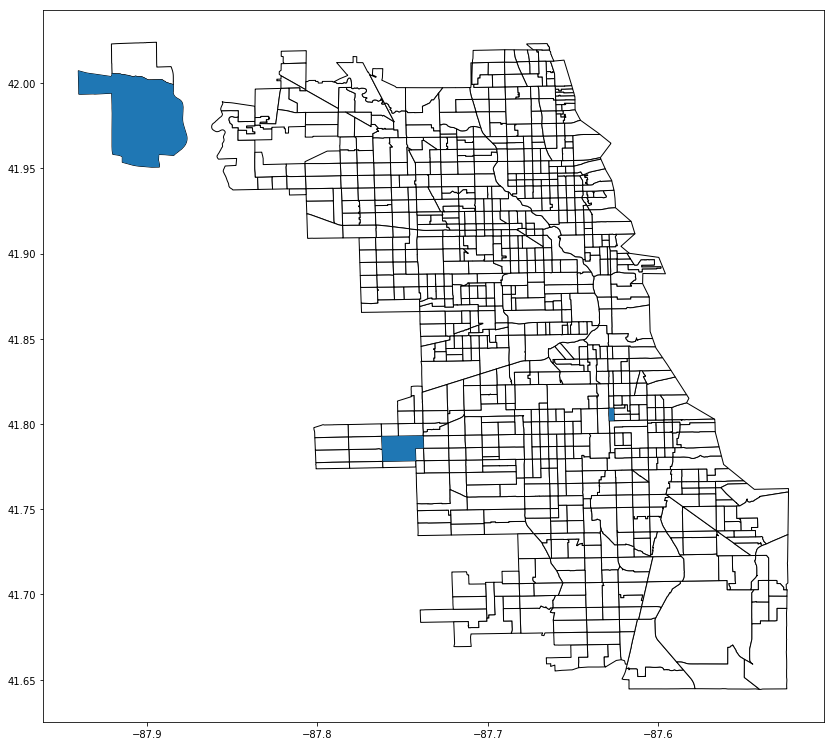

In [18]:
ax = chicago_race.plot(color='white', edgecolor='black', figsize=(14,14))
chicago_race[chicago_race['Id2'].isin(['17031980100', '17031381700', '17031980000'])].plot(ax=ax)

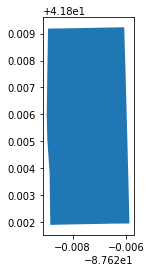

In [19]:
chicago_race[chicago_race['Id2'].isin(['17031381700'])].plot()

In [20]:
zero_inds = chicago_race[chicago_race['Id2'].isin(['17031980100', '17031381700', '17031980000'])].index.tolist()
for col in chicago_race.columns:
    if "Percent;" in col:
        chicago_race.loc[zero_inds, col] = 0

In [21]:
# Coercing these demographic features to the 'float' type
for col in chicago_race.columns:
    if "Percent;" in col:
        chicago_race[col] = chicago_race[col].astype(float)

# Mapping

Now that we have data in the correct format with the correct type, we can start mapping out some features of interest. I'm not sure if a red-orange color scale is best for this data, but it's certainly striking.

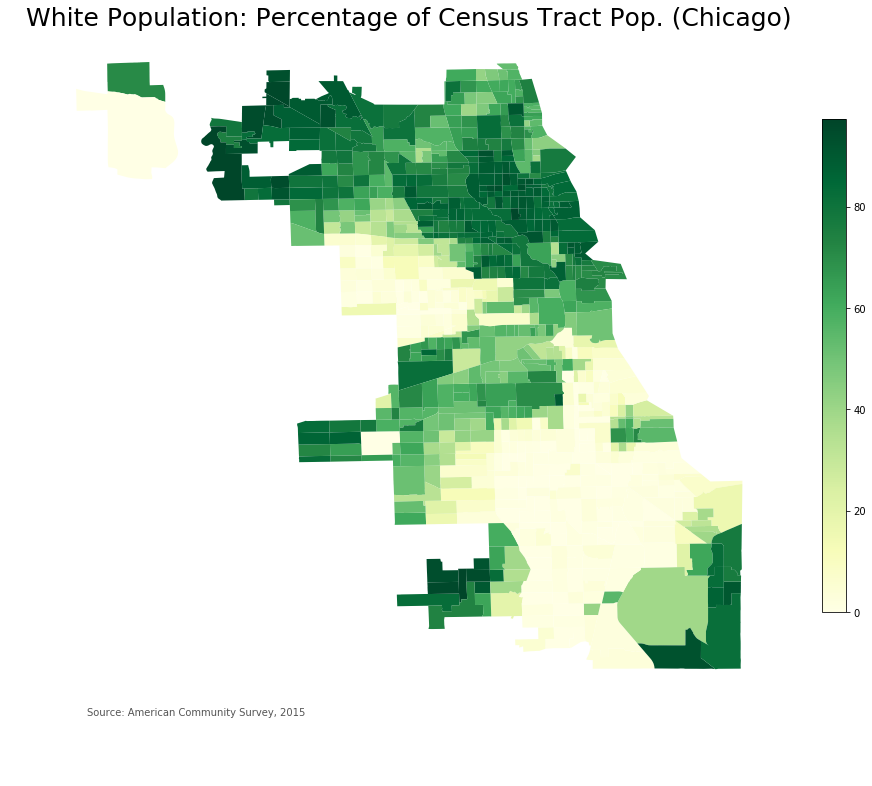

In [27]:
fig, ax = plt.subplots(figsize=(14,14))
my_cmap='YlGn'
race_col = 'Percent; RACE - One race - White'
vmin = chicago_race[race_col].min()
vmax = chicago_race[race_col].max()

_ = chicago_race.plot(column=race_col, 
                      cmap=my_cmap, ax=ax)
_ = ax.axis('off')
_ = ax.set_title("White Population: Percentage of Census Tract Pop. (Chicago)", 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2015',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

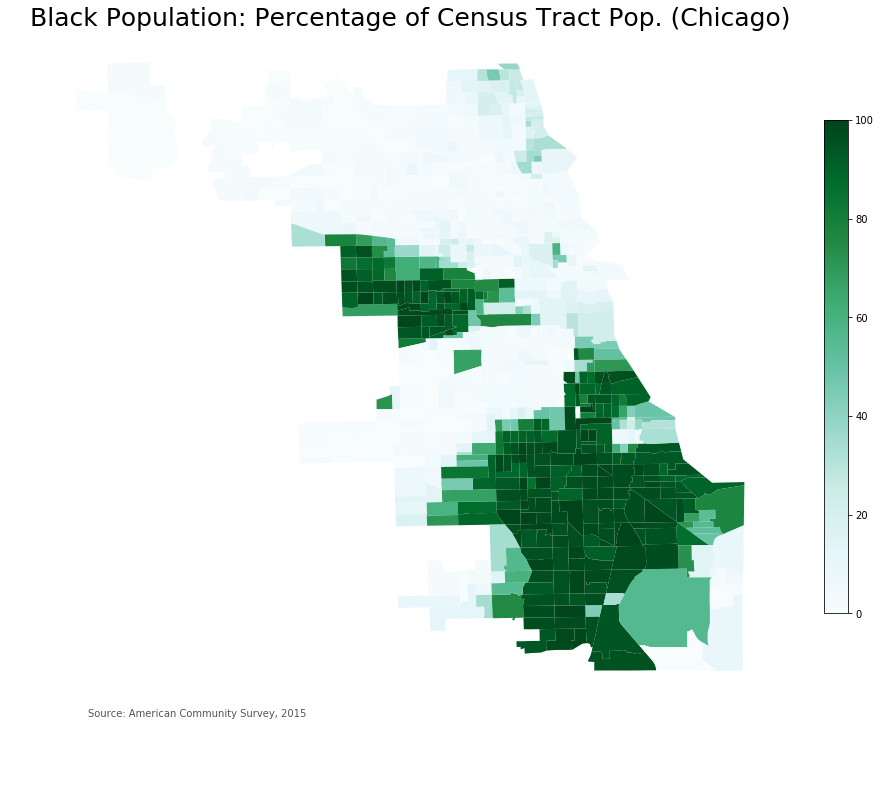

In [29]:
fig, ax = plt.subplots(figsize=(14,14))
my_cmap='BuGn'
race_col = 'Percent; RACE - One race - Black or African American'
vmin = chicago_race[race_col].min()
vmax = chicago_race[race_col].max()

_ = chicago_race.plot(column=race_col, 
                      cmap=my_cmap, ax=ax)
_ = ax.axis('off')
_ = ax.set_title("Black Population: Percentage of Census Tract Pop. (Chicago)", 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2015',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

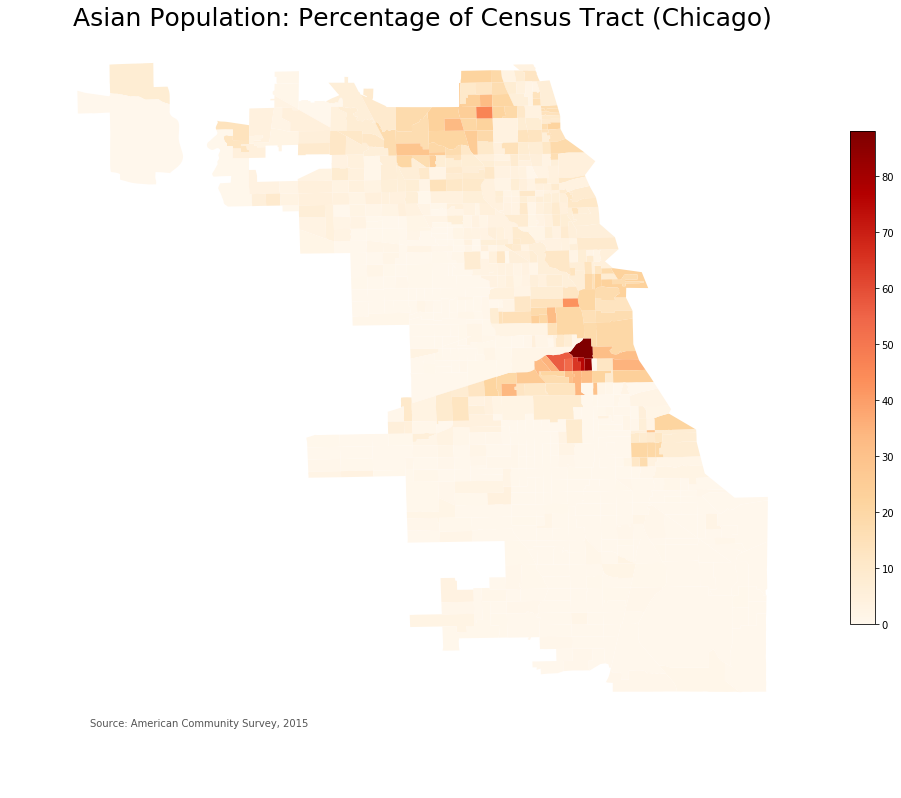

In [24]:
fig, ax = plt.subplots(figsize=(14,14))
my_cmap='OrRd'
race_col = 'Percent; RACE - One race - Asian'
vmin = chicago_race[race_col].min()
vmax = chicago_race[race_col].max()

_ = chicago_race.plot(column=race_col, 
                      cmap=my_cmap, ax=ax)
_ = ax.axis('off')
_ = ax.set_title("Asian Population: Percentage of Census Tract (Chicago)", 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2015',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

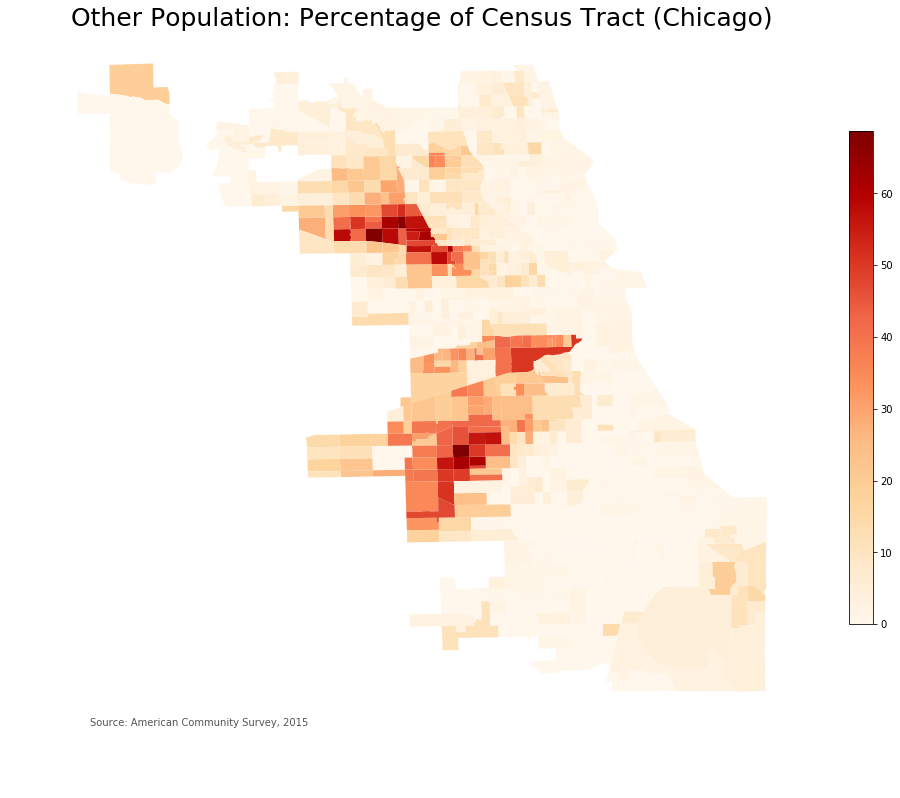

In [41]:
fig, ax = plt.subplots(figsize=(14,14))
my_cmap='OrRd'
race_col = 'Percent; RACE - One race - Some other race'
vmin = chicago_race[race_col].min()
vmax = chicago_race[race_col].max()

_ = chicago_race.plot(column=race_col, 
                      cmap=my_cmap, ax=ax)
_ = ax.axis('off')
_ = ax.set_title("Other Population: Percentage of Census Tract (Chicago)", 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2015',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

In [26]:
chicago_race['Percent; RACE - One race - Some other race'].max()

68.7

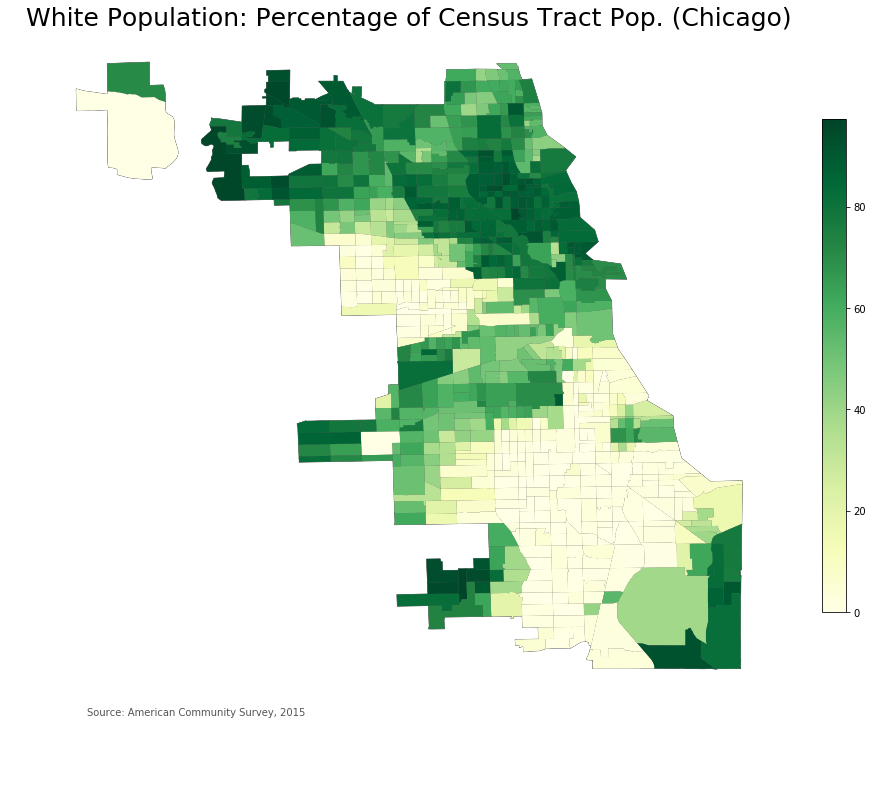

In [42]:
fig, ax = plt.subplots(figsize=(14,14))
my_cmap='YlGn'
race_col = 'Percent; RACE - One race - White'
vmin = chicago_race[race_col].min()
vmax = chicago_race[race_col].max()

base = chicago_race.plot(color='white', edgecolor='black', linewidth=0.5, ax=ax)

_ = chicago_race.plot(column=race_col, 
                      cmap=my_cmap, ax=base)
_ = ax.axis('off')
_ = ax.set_title("White Population: Percentage of Census Tract Pop. (Chicago)", 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2015',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

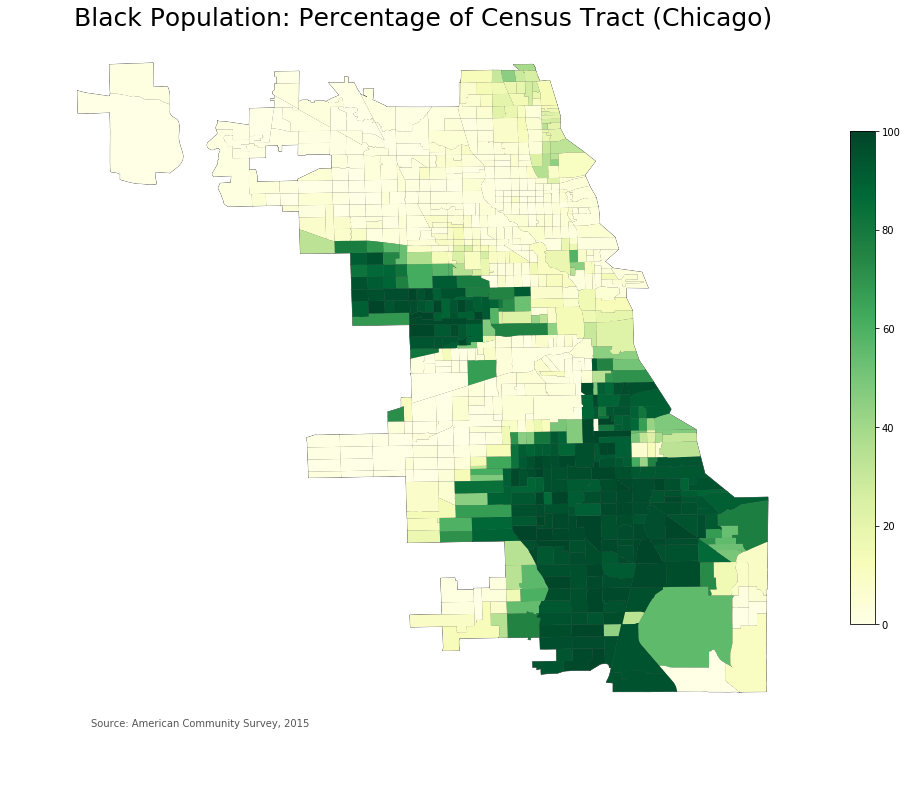

In [39]:
fig, ax = plt.subplots(figsize=(14,14))
my_cmap='YlGn'
race_col = 'Percent; RACE - One race - Black or African American'
vmin = chicago_race[race_col].min()
vmax = chicago_race[race_col].max()

base = chicago_race.plot(color='white', edgecolor='black', linewidth=0.5, ax=ax)

_ = chicago_race.plot(column=race_col, 
                      cmap=my_cmap, ax=base)
_ = ax.axis('off')
_ = ax.set_title('Black Population: Percentage of Census Tract (Chicago)', 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2015',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

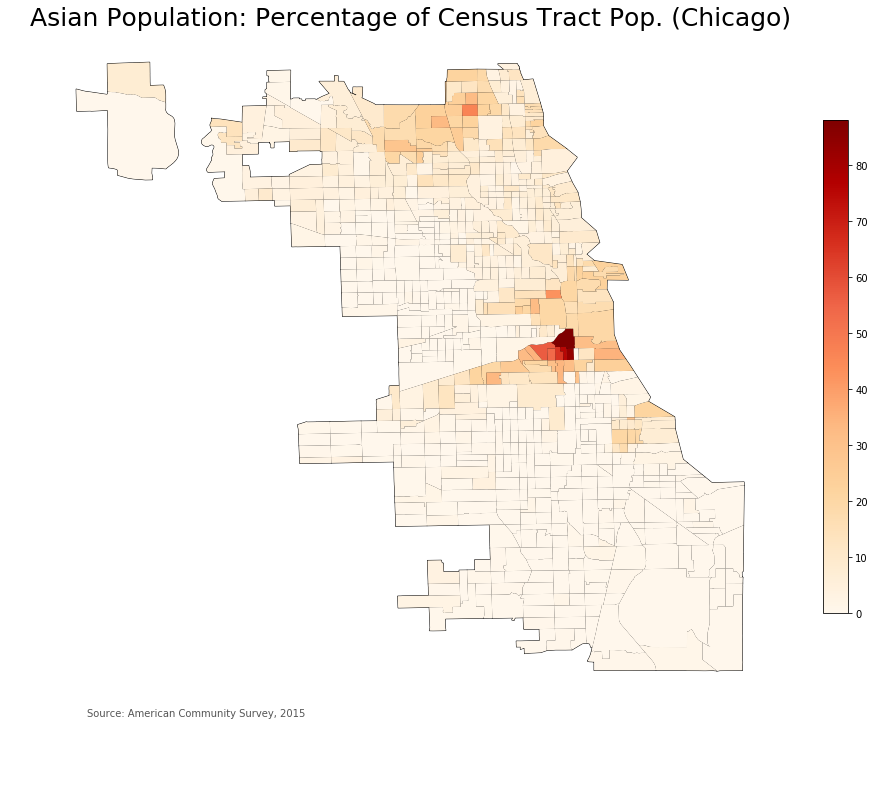

In [27]:
fig, ax = plt.subplots(figsize=(14,14))
my_cmap='OrRd'
race_col = 'Percent; RACE - One race - Asian'
vmin = chicago_race[race_col].min()
vmax = chicago_race[race_col].max()

base = chicago_race.plot(color='white', edgecolor='black', ax=ax)

_ = chicago_race.plot(column=race_col, 
                      cmap=my_cmap, ax=base)
_ = ax.axis('off')
_ = ax.set_title('Asian Population: Percentage of Census Tract Pop. (Chicago)', 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2015',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

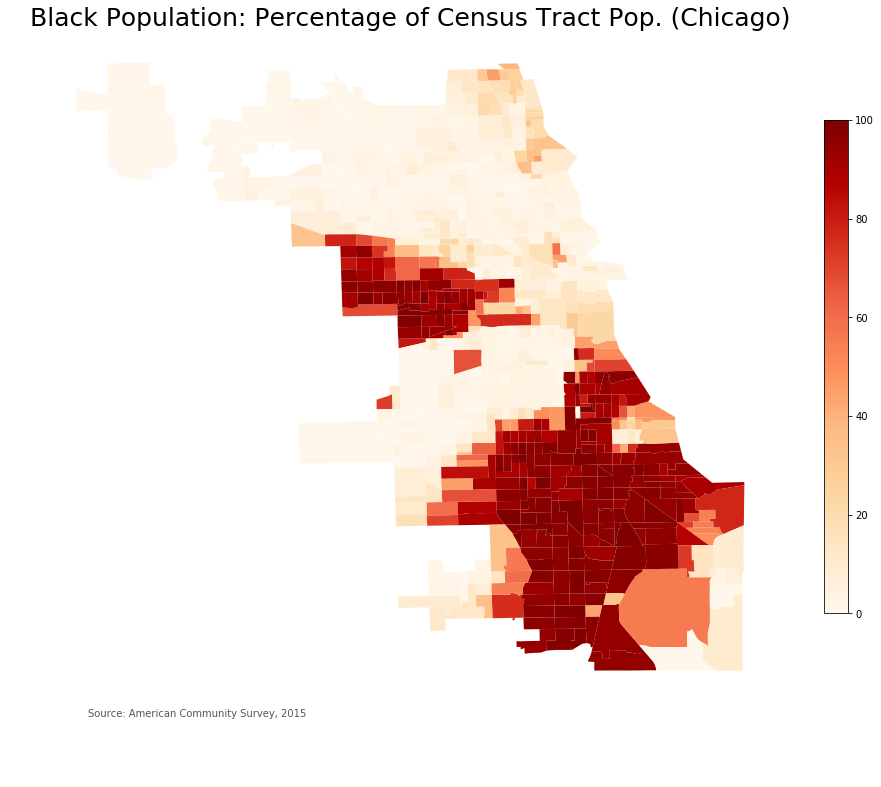

In [28]:
fig, ax = plt.subplots(figsize=(14,14))
my_cmap='OrRd'

_ = chicago_race.plot(column='Percent; RACE - One race - Black or African American', 
                      cmap=my_cmap, ax=ax)
_ = ax.axis('off')
_ = ax.set_title("Black Population: Percentage of Census Tract Pop. (Chicago)", 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2015',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=100))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

In [114]:
chicago_race['Percent; RACE - One race - Asian'].max()

88.1